In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Filtering**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/skripsi_chandra/scraped dataset.csv")
print(len(dataset))

23545


In [ ]:
filtered_dataset = dataset[dataset['reviews'].str.split().apply(len) >= 5]

filtered_dataset.duplicated().sum()

4

In [ ]:
filtered_dataset.drop_duplicates(inplace=True)

<ipython-input-10-9559c86f3f2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset.drop_duplicates(inplace=True)


In [ ]:
len(filtered_dataset)

11645

In [ ]:
filtered_dataset.to_csv('filtered dataset.csv', index = False)

# **Preprocessing**
*   Casefolding
*   Non Alphanumeric Removal
*   Normalization
*   Stemming
*   Tokenization

In [ ]:
import pandas as pd

data_original = pd.read_csv('/content/drive/MyDrive/skripsi_chandra/labeled dataset.csv')
data_original.head()

,reviews,Performance and Stability,Payment,Content,Satisfaction
0,sy kasih 2 dulu yah nanti kalau udah lancar ak...,neg,NaN,neg,neg
1,"Agak kecewa, gak optimal. Setiap kali nonton d...",neg,NaN,neg,neg
2,"Aplikasiya jelek banget, setiap kita keluar da...",neg,NaN,NaN,neg
3,"Admin, tolong munculkan fitur on/off autoplay....",neg,NaN,NaN,NaN
4,Aplikasi bagus yg sangat direkomendasikan utk ...,pos,NaN,NaN,pos


In [ ]:
dataset=data_original[['reviews']].copy()

In [ ]:
len(data_original.index)

10673

## **Case Folding**

In [ ]:
def clean_cf(text):
  text = text.lower()
  return text

dataset['review_cf'] = dataset['reviews'].apply(lambda x:clean_cf(x))

dataset.head()

,reviews,review_cf
0,sy kasih 2 dulu yah nanti kalau udah lancar ak...,sy kasih 2 dulu yah nanti kalau udah lancar ak...
1,"Agak kecewa, gak optimal. Setiap kali nonton d...","agak kecewa, gak optimal. setiap kali nonton d..."
2,"Aplikasiya jelek banget, setiap kita keluar da...","aplikasiya jelek banget, setiap kita keluar da..."
3,"Admin, tolong munculkan fitur on/off autoplay....","admin, tolong munculkan fitur on/off autoplay...."
4,Aplikasi bagus yg sangat direkomendasikan utk ...,aplikasi bagus yg sangat direkomendasikan utk ...


## **Non Alphabetic Removal**

In [ ]:
import re
def clean_naremoval(text):
  text = re.sub('[^a-zA-Z]',' ',text)
  return text

dataset['review_naremoval'] = dataset['review_cf'].apply(lambda x:clean_naremoval(x))

dataset.head()

,reviews,review_cf,review_naremoval
0,sy kasih 2 dulu yah nanti kalau udah lancar ak...,sy kasih 2 dulu yah nanti kalau udah lancar ak...,sy kasih dulu yah nanti kalau udah lancar ak...
1,"Agak kecewa, gak optimal. Setiap kali nonton d...","agak kecewa, gak optimal. setiap kali nonton d...",agak kecewa gak optimal setiap kali nonton d...
2,"Aplikasiya jelek banget, setiap kita keluar da...","aplikasiya jelek banget, setiap kita keluar da...",aplikasiya jelek banget setiap kita keluar da...
3,"Admin, tolong munculkan fitur on/off autoplay....","admin, tolong munculkan fitur on/off autoplay....",admin tolong munculkan fitur on off autoplay ...
4,Aplikasi bagus yg sangat direkomendasikan utk ...,aplikasi bagus yg sangat direkomendasikan utk ...,aplikasi bagus yg sangat direkomendasikan utk ...


## **Normalization**

In [ ]:
slang_dict = pd.read_csv('/content/drive/MyDrive/skripsi_chandra/colloquial-indonesian-lexicon.csv')
slang_dict.head()

,slang,formal,In dictionary,context,category1,category2,category3
0,woww,wow,1.0,wow,elongasi,0,0
1,aminn,amin,1.0,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
2,met,selamat,1.0,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
3,netaas,menetas,1.0,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0
4,keberpa,ke berapa,0.0,Birthday yg keberpa kak?,abreviasi,0,0


In [ ]:
slang_dict = slang_dict.filter(['slang', 'formal']).drop_duplicates(subset=['slang'], keep='first').set_index('slang')

In [ ]:
reviews = dataset['review_naremoval'].copy()

for review_index in range(len(reviews)):
  sentences = reviews[review_index].split(' ')

  for sentence_index in range(len(sentences)):
    if sentences[sentence_index] in slang_dict.index:
      sentences[sentence_index] = slang_dict.loc[sentences[sentence_index]]['formal']

  reviews[review_index] = ' '.join(sentences)

dataset['review_norm'] = reviews

dataset.head()

,reviews,review_cf,review_naremoval,review_norm
0,sy kasih 2 dulu yah nanti kalau udah lancar ak...,sy kasih 2 dulu yah nanti kalau udah lancar ak...,sy kasih dulu yah nanti kalau udah lancar ak...,saya kasih dulu ya nanti kalau sudah lancar ...
1,"Agak kecewa, gak optimal. Setiap kali nonton d...","agak kecewa, gak optimal. setiap kali nonton d...",agak kecewa gak optimal setiap kali nonton d...,agak kecewa tidak optimal setiap kali menont...
2,"Aplikasiya jelek banget, setiap kita keluar da...","aplikasiya jelek banget, setiap kita keluar da...",aplikasiya jelek banget setiap kita keluar da...,aplikasinya jelek banget setiap kita keluar d...
3,"Admin, tolong munculkan fitur on/off autoplay....","admin, tolong munculkan fitur on/off autoplay....",admin tolong munculkan fitur on off autoplay ...,admin tolong munculkan fitur on off autoplay ...
4,Aplikasi bagus yg sangat direkomendasikan utk ...,aplikasi bagus yg sangat direkomendasikan utk ...,aplikasi bagus yg sangat direkomendasikan utk ...,aplikasi bagus yang sangat direkomendasikan un...


## **Stemming**

In [ ]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
reviews_norm = dataset['review_norm'].copy()

In [ ]:
for i in range(len(reviews_norm)):
  reviews_norm[i] = stemmer.stem(reviews_norm[i])

dataset['review_stem'] = reviews_norm

dataset.head()

,reviews,review_cf,review_naremoval,review_norm,review_stem
0,sy kasih 2 dulu yah nanti kalau udah lancar ak...,sy kasih 2 dulu yah nanti kalau udah lancar ak...,sy kasih dulu yah nanti kalau udah lancar ak...,saya kasih dulu ya nanti kalau sudah lancar ...,saya kasih dulu ya nanti kalau sudah lancar ak...
1,"Agak kecewa, gak optimal. Setiap kali nonton d...","agak kecewa, gak optimal. setiap kali nonton d...",agak kecewa gak optimal setiap kali nonton d...,agak kecewa tidak optimal setiap kali menont...,agak kecewa tidak optimal tiap kali tonton dan...
2,"Aplikasiya jelek banget, setiap kita keluar da...","aplikasiya jelek banget, setiap kita keluar da...",aplikasiya jelek banget setiap kita keluar da...,aplikasinya jelek banget setiap kita keluar d...,aplikasi jelek banget tiap kita keluar dari ap...
3,"Admin, tolong munculkan fitur on/off autoplay....","admin, tolong munculkan fitur on/off autoplay....",admin tolong munculkan fitur on off autoplay ...,admin tolong munculkan fitur on off autoplay ...,admin tolong muncul fitur on off autoplay sedi...
4,Aplikasi bagus yg sangat direkomendasikan utk ...,aplikasi bagus yg sangat direkomendasikan utk ...,aplikasi bagus yg sangat direkomendasikan utk ...,aplikasi bagus yang sangat direkomendasikan un...,aplikasi bagus yang sangat rekomendasi untuk t...


## **Tokenization**

In [ ]:
corpus = []
for review in dataset['review_stem']:
  corpus.extend(review.split())

In [ ]:
words = []
word_counts = []

for word in corpus:
  if word not in words:
    words.append(word)
    word_counts.append(1)
  else:
    word_counts[words.index(word)] += 1

In [ ]:
print("total words: ", sum(word_counts))

total words:  161679


In [ ]:
len(words)

5247

In [ ]:
sum_words = []

for num in [50, 250, 750 , 1500, 2500]:
  sum_words.append(sum(word_counts[:num]))

sum_words

[44504, 109202, 145211, 153638, 157624]

Text(0, 0.5, 'Total words')

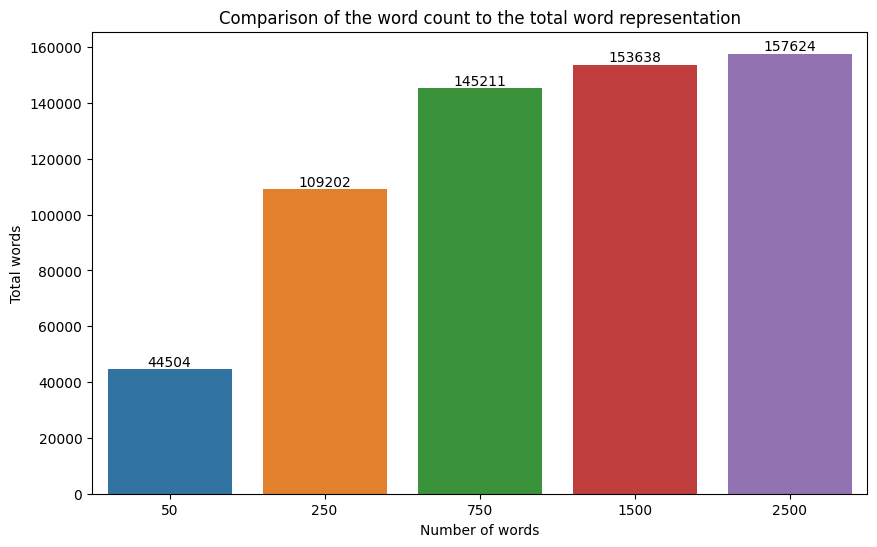

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=[50, 250, 750 , 1500, 2500],
            y=sum_words)
ax.bar_label(ax.containers[0])
plt.title("Comparison of the word count to the total word representation")
plt.xlabel("Number of words")
plt.ylabel("Total words")

In [ ]:
covered_words = round((157624 / 161679) * 100, 1)
print(f"{covered_words}%")

97.5%


In [ ]:
from keras.preprocessing.text import Tokenizer

texts = dataset['review_stem'].tolist()
tokenizer = Tokenizer(num_words=2500, char_level=False)
tokenizer.fit_on_texts(texts)
text_token = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

dataset['review_token'] = text_token

dataset.head()

,reviews,review_cf,review_naremoval,review_norm,review_stem,review_token
0,sy kasih 2 dulu yah nanti kalau udah lancar ak...,sy kasih 2 dulu yah nanti kalau udah lancar ak...,sy kasih dulu yah nanti kalau udah lancar ak...,saya kasih dulu ya nanti kalau sudah lancar ak...,saya kasih dulu ya nanti kalau sudah lancar ak...,"[7, 36, 62, 27, 269, 26, 6, 97, 334, 7, 288, 2..."
1,"Agak kecewa, gak optimal. Setiap kali nonton d...","agak kecewa, gak optimal. setiap kali nonton d...",agak kecewa gak optimal setiap kali nonton d...,agak kecewa tidak optimal tiap kali tonton dan...,agak kecewa tidak optimal tiap kali tonton dan...,"[293, 74, 1, 913, 107, 80, 4, 19, 186, 15, 198..."
2,"Aplikasiya jelek banget, setiap kita keluar da...","aplikasiya jelek banget, setiap kita keluar da...",aplikasiya jelek banget setiap kita keluar da...,aplikasi jelek banget tiap kita keluar dari ap...,aplikasi jelek banget tiap kita keluar dari ap...,"[2, 87, 17, 107, 137, 213, 89, 2, 82, 6, 53, 3..."
3,"Admin, tolong munculkan fitur on/off autoplay....","admin, tolong munculkan fitur on/off autoplay....",admin tolong munculkan fitur on off autoplay ...,admin tolong muncul fitur on off autoplay sedi...,admin tolong muncul fitur on off autoplay sedi...,"[328, 32, 186, 329, 820, 1178, 2402, 326, 2403..."
4,Aplikasi bagus yg sangat direkomendasikan utk ...,aplikasi bagus yg sangat direkomendasikan utk ...,aplikasi bagus yg sangat direkomendasikan utk ...,aplikasi bagus yang sangat rekomendasi untuk t...,aplikasi bagus yang sangat rekomendasi untuk t...,"[2, 14, 12, 33, 519, 41, 4, 50, 25, 19, 68, 68..."


In [ ]:
print('unique words:', len(word_index))

unique words: 5246


In [ ]:
print(dataset['review_stem'][200])
print(dataset['review_token'][200])

download langsung buka film taruh episode eh malah tidak buka auto uninstall padahal sudah pakai data tetapi masih suruh beli ribet
[53, 119, 90, 25, 1196, 147, 181, 37, 1, 90, 412, 197, 30, 6, 34, 252, 9, 49, 146, 31, 141]


In [ ]:
word_index

{'tidak': 1,
 'aplikasi': 2,
 'bisa': 3,
 'tonton': 4,
 'di': 5,
 'sudah': 6,
 'saya': 7,
 'nya': 8,
 'tetapi': 9,
 'ada': 10,
 'bayar': 11,
 'yang': 12,
 'ini': 13,
 'bagus': 14,
 'iklan': 15,
 'langgan': 16,
 'banget': 17,
 'paket': 18,
 'dan': 19,
 'saja': 20,
 'lagi': 21,
 'banyak': 22,
 'mau': 23,
 'vidio': 24,
 'film': 25,
 'kalau': 26,
 'ya': 27,
 'terus': 28,
 'kenapa': 29,
 'padahal': 30,
 'beli': 31,
 'tolong': 32,
 'sangat': 33,
 'pakai': 34,
 'video': 35,
 'kasih': 36,
 'malah': 37,
 'jadi': 38,
 'harus': 39,
 'kok': 40,
 'untuk': 41,
 'tv': 42,
 'buat': 43,
 'baik': 44,
 'eror': 45,
 'suka': 46,
 'juga': 47,
 'sih': 48,
 'masih': 49,
 'bola': 50,
 'aku': 51,
 'pulsa': 52,
 'download': 53,
 'live': 54,
 'apa': 55,
 'sama': 56,
 'premium': 57,
 'bintang': 58,
 'aktif': 59,
 'karena': 60,
 'belum': 61,
 'dulu': 62,
 'sekarang': 63,
 'lihat': 64,
 'ke': 65,
 'siar': 66,
 'lama': 67,
 'lain': 68,
 'baru': 69,
 'sering': 70,
 'lebih': 71,
 'dong': 72,
 'cuma': 73,
 'kecewa': 74,

In [ ]:
import json
filename = "word_index.json"

with open(filename, "w") as json_file:
    json.dump(word_index, json_file)

# **FastText Embedding**

In [ ]:
import codecs
import numpy as np
from tqdm import tqdm

In [ ]:
import codecs
import numpy as np
from tqdm import tqdm

embeddings_index = {}
f = codecs.open('/content/drive/MyDrive/skripsi_chandra/cc.id.300.vec', encoding='utf-8')
for line in tqdm(f):
  values = line.rstrip().rsplit(' ')
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

2000001it [04:28, 7439.29it/s]


In [ ]:
nb_words = 2500
embed_dim = 300
embedding_matrix = np.zeros((nb_words, embed_dim))
words_not_found = []

for word, i in word_index.items():
  if i >= nb_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if (embedding_vector is not None) and len(embedding_vector) > 0:
    embedding_matrix[i] = embedding_vector[:embed_dim]
  else:
    words_not_found.append(word)

In [ ]:
np.save('embedding_matrix.npy', embedding_matrix)

In [ ]:
print('number of null word embeddings:', len(words_not_found))
print('words with null embeddings:', words_not_found)

number of null word embeddings: 87
words with null embeddings: ['gtv', 'ngebug', 'ngefreeze', 'drakornya', 'banggan', 'shoopepay', 'acau', 'mctv', 'fhd', 'shopeepay', 'bstation', 'mntang', 'wetv', 'curacao', 'bajirao', 'mastani', 'shoope', 'hollywoodnya', 'axisnet', 'ygy', 'spotv', 'bhsi', 'ngbug', 'radhakrishna', 'brieffing', 'bngke', 'kasarin', 'margotop', 'yare', 'mytelkomsel', 'beinsport', 'pemium', 'berpangganan', 'gopaynya', 'kampretttt', 'rnak', 'nyhh', 'lsts', 'rendet', 'shoppe', 'suuu', 'bangkeeee', 'jhoda', 'spuas', 'donghua', 'fakkk', 'gpay', 'rrg', 'prtm', 'ilannya', 'timbas', 'oala', 'pokonamah', 'ochenel', 'gsh', 'linkaja', 'rekomendet', 'tbg', 'sasuolo', 'shipuden', 'ninton', 'nhi', 'candaaa', 'breee', 'lokadrama', 'salernitana', 'juancok', 'manctv', 'monkart', 'ninaplikasi', 'kuote', 'brokokok', 'njiir', 'dreamies', 'peaaaa', 'saggat', 'wnl', 'dinamon', 'ngereffres', 'ditanyangin', 'napain', 'reulosi', 'proveder', 'menganj', 'bvideo', 'ngerefress', 'gigamax']


In [ ]:
type(embedding_matrix)

numpy.ndarray

In [ ]:
len(embedding_matrix)

2500

# **Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = data_original[['Performance and Stability', 'Payment', 'Content', 'Satisfaction']]
data.head()

,Performance and Stability,Payment,Content,Satisfaction
0,neg,NaN,neg,neg
1,neg,NaN,neg,neg
2,neg,NaN,NaN,neg
3,neg,NaN,NaN,NaN
4,pos,NaN,NaN,pos


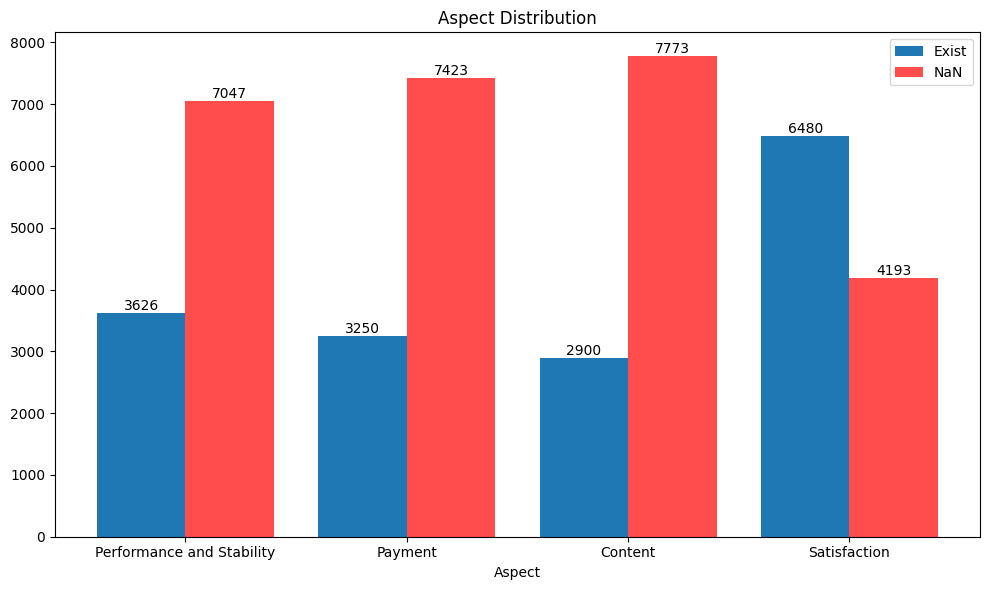

In [ ]:
criteria = {'Performance and Stability': ['pos', 'neg'],
            'Payment': ['pos', 'neg'],
            'Content': ['pos', 'neg'],
            'Satisfaction': ['pos', 'neg']}

# Count the occurrences of the criteria values in each column
value_counts = data.isin(criteria).sum()
nan_counts = data.isnull().sum()

bar_width = 0.4
index = range(len(value_counts))

plt.figure(figsize=(10, 6))
bars1 = plt.bar(index, value_counts.values, width=bar_width, label='Exist')
bars2 = plt.bar([i + bar_width for i in index], nan_counts.values, width=bar_width, label='NaN', color='red', alpha=0.7)

plt.xlabel('Aspect')
plt.title('Aspect Distribution')
plt.xticks([i + bar_width/2 for i in index], value_counts.index)
plt.legend()

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom', fontsize=10)
S
plt.tight_layout()
plt.show()

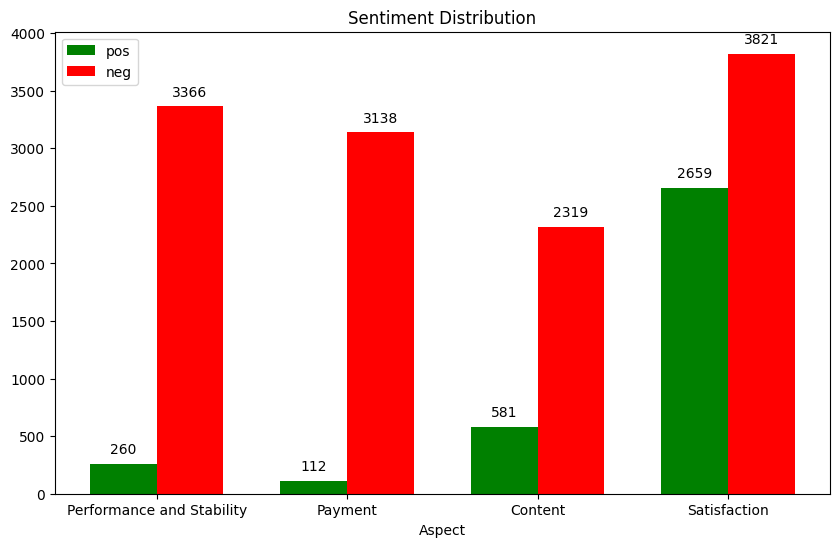

In [ ]:
value_counts = data.apply(pd.Series.value_counts)

# Extract the 'pos' and 'neg' counts, and fill NaN with zeros
pos_counts = value_counts.loc['pos'].fillna(0)
neg_counts = value_counts.loc['neg'].fillna(0)

columns = data.columns
positions = np.arange(len(columns))

bar_width = 0.35

# Multiple bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(positions - bar_width/2, pos_counts, bar_width, label='pos', color='green')
ax.bar(positions + bar_width/2, neg_counts, bar_width, label='neg', color='red')

ax.set_xticks(positions)
ax.set_xticklabels(columns)
ax.set_xlabel('Aspect')
ax.set_title('Sentiment Distribution')

# Annotations
for i, pos_count in enumerate(pos_counts):
  ax.annotate(str(int(pos_count)), xy=(positions[i] - bar_width/2, pos_count),
              xytext=(0, 5), textcoords='offset points',
              ha='center', va='bottom', color='black')

for i, neg_count in enumerate(neg_counts):
  ax.annotate(str(int(neg_count)), xy=(positions[i] + bar_width/2, neg_count),
              xytext=(0, 5), textcoords='offset points',
              ha='center', va='bottom', color='black')

ax.legend()
plt.show()

# **Aspect and Sentiment**

In [ ]:
data_sep = data_original[['Performance and Stability', 'Payment', 'Content', 'Satisfaction']]
data_sep.head()

,Performance and Stability,Payment,Content,Satisfaction
0,neg,NaN,neg,neg
1,neg,NaN,neg,neg
2,neg,NaN,NaN,neg
3,neg,NaN,NaN,NaN
4,pos,NaN,NaN,pos


## **Aspect Classification Dataset**

In [ ]:
data_aspect = data_sep.copy()
columns_to_convert = ['Performance and Stability', 'Payment', 'Content', 'Satisfaction']

for column in columns_to_convert:
  data_aspect[column] = [1 if val in ['pos', 'neg'] else 0 for val in data_aspect[column]]

data_aspect.head()

,Performance and Stability,Payment,Content,Satisfaction
0,1,0,1,1
1,1,0,1,1
2,1,0,0,1
3,1,0,0,0
4,1,0,0,1


In [ ]:
data_aspect['aspects'] = data_aspect.apply(lambda row: row.tolist(), axis=1)
data_aspect = data_aspect.drop(['Performance and Stability', 'Payment', 'Content', 'Satisfaction'], axis=1)

In [ ]:
data_aspect.head()

,aspects
0,"[1, 0, 1, 1]"
1,"[1, 0, 1, 1]"
2,"[1, 0, 0, 1]"
3,"[1, 0, 0, 0]"
4,"[1, 0, 0, 1]"


In [ ]:
len(data_aspect)

10673

In [ ]:
data_aspect_final = pd.concat([dataset['review_token'], data_aspect['aspects']], axis=1)
data_aspect_final.head()

,review_token,aspects
0,"[7, 36, 62, 27, 269, 26, 6, 97, 334, 7, 288, 2...","[1, 0, 1, 1]"
1,"[293, 74, 1, 913, 107, 80, 4, 19, 186, 15, 198...","[1, 0, 1, 1]"
2,"[2, 87, 17, 107, 137, 213, 89, 2, 82, 6, 53, 3...","[1, 0, 0, 1]"
3,"[328, 32, 186, 329, 820, 1178, 2402, 326, 2403...","[1, 0, 0, 0]"
4,"[2, 14, 12, 33, 519, 41, 4, 50, 25, 19, 68, 68...","[1, 0, 0, 1]"


In [ ]:
data_aspect_final.to_csv('ABSA_aspect.csv', index = False)

## **Sentiment Classification Dataset**

In [ ]:
data_performance = data_sep[['Performance and Stability']].copy()
data_payment = data_sep[['Payment']].copy()
data_content = data_sep[['Content']].copy()
data_satisfaction = data_sep[['Satisfaction']].copy()

In [ ]:
data_performance.dropna(inplace=True)
data_payment.dropna(inplace=True)
data_content.dropna(inplace=True)
data_satisfaction.dropna(inplace=True)

In [ ]:
print(len(data_performance))
print(len(data_payment))
print(len(data_content))
print(len(data_satisfaction))

3626
3250
2900
6480


### **Performance and Stability**

In [ ]:
# Performance and Stability
columns_to_convert = ['Performance and Stability']

for column in columns_to_convert:
  data_performance[column] = [1 if val in ['pos'] else 0 for val in data_performance[column]]

data_performance.head()

,Performance and Stability
0,0
1,0
2,0
3,0
4,1


In [ ]:
data_performance = pd.concat([dataset['review_token'], data_performance['Performance and Stability']], axis=1)
data_performance.head()

,review_token,Performance and Stability
0,"[7, 36, 62, 27, 269, 26, 6, 97, 334, 7, 288, 2...",0.0
1,"[293, 74, 1, 913, 107, 80, 4, 19, 186, 15, 198...",0.0
2,"[2, 87, 17, 107, 137, 213, 89, 2, 82, 6, 53, 3...",0.0
3,"[328, 32, 186, 329, 820, 1178, 2402, 326, 2403...",0.0
4,"[2, 14, 12, 33, 519, 41, 4, 50, 25, 19, 68, 68...",1.0


In [ ]:
len(data_performance)

10673

In [ ]:
data_performance.dropna(inplace=True)

In [ ]:
data_performance['Performance and Stability'] = data_performance['Performance and Stability'].apply(int)
data_performance.head()

,review_token,Performance and Stability
0,"[7, 36, 62, 27, 269, 26, 6, 97, 334, 7, 288, 2...",0
1,"[293, 74, 1, 913, 107, 80, 4, 19, 186, 15, 198...",0
2,"[2, 87, 17, 107, 137, 213, 89, 2, 82, 6, 53, 3...",0
3,"[328, 32, 186, 329, 820, 1178, 2402, 326, 2403...",0
4,"[2, 14, 12, 33, 519, 41, 4, 50, 25, 19, 68, 68...",1


In [ ]:
data_performance.to_csv('ABSA_performance.csv', index = False)

In [ ]:
len(data_performance)

3626

In [ ]:
data_performance['Performance and Stability'].value_counts()

0    3366
1     260
Name: Performance and Stability, dtype: int64

### **Payment**

In [ ]:
columns_to_convert = ['Payment']

for column in columns_to_convert:
  data_payment[column] = [1 if val in ['pos'] else 0 for val in data_payment[column]]

data_payment.head()

,Payment
7,0
10,0
11,0
12,0
17,0


In [ ]:
data_payment = pd.concat([dataset['review_token'], data_payment['Payment']], axis=1)
data_payment.head()

,review_token,Payment
0,"[7, 36, 62, 27, 269, 26, 6, 97, 334, 7, 288, 2...",NaN
1,"[293, 74, 1, 913, 107, 80, 4, 19, 186, 15, 198...",NaN
2,"[2, 87, 17, 107, 137, 213, 89, 2, 82, 6, 53, 3...",NaN
3,"[328, 32, 186, 329, 820, 1178, 2402, 326, 2403...",NaN
4,"[2, 14, 12, 33, 519, 41, 4, 50, 25, 19, 68, 68...",NaN


In [ ]:
len(data_payment)

10673

In [ ]:
data_payment.dropna(inplace=True)

In [ ]:
data_payment['Payment'] = data_payment['Payment'].apply(int)
data_payment.head()

,review_token,Payment
7,"[7, 6, 2406, 19, 31, 34, 2407, 633, 5, 2, 361,...",0
10,"[7, 6, 70, 16, 73, 80, 13, 74, 6, 11, 88, 9, 1...",0
11,"[2, 1, 83, 6, 799, 18, 16, 9, 1, 3, 34, 5, 341...",0
12,"[1461, 688, 91, 821, 865, 68, 33, 74, 113, 315...",0
17,"[49, 46, 45, 41, 31, 18, 268, 37, 113, 65, 31,...",0


In [ ]:
len(data_payment)

3250

In [ ]:
data_payment['Payment'].value_counts()

0    3138
1     112
Name: Payment, dtype: int64

In [ ]:
data_payment.to_csv('ABSA_payment.csv', index = False)

### **Content**

In [ ]:
columns_to_convert = ['Content']

for column in columns_to_convert:
  data_content[column] = [1 if val in ['pos'] else 0 for val in data_content[column]]

data_content.head()

,Content
0,0
1,0
6,0
8,0
9,0


In [ ]:
data_content = pd.concat([dataset['review_token'], data_content['Content']], axis=1)
data_content.head()

,review_token,Content
0,"[7, 36, 62, 27, 269, 26, 6, 97, 334, 7, 288, 2...",0.0
1,"[293, 74, 1, 913, 107, 80, 4, 19, 186, 15, 198...",0.0
2,"[2, 87, 17, 107, 137, 213, 89, 2, 82, 6, 53, 3...",NaN
3,"[328, 32, 186, 329, 820, 1178, 2402, 326, 2403...",NaN
4,"[2, 14, 12, 33, 519, 41, 4, 50, 25, 19, 68, 68...",NaN


In [ ]:
len(data_content)

10673

In [ ]:
data_content.dropna(inplace=True)

In [ ]:
data_content['Content'] = data_content['Content'].apply(int)
data_content.head()

,review_token,Content
0,"[7, 36, 62, 27, 269, 26, 6, 97, 334, 7, 288, 2...",0
1,"[293, 74, 1, 913, 107, 80, 4, 19, 186, 15, 198...",0
6,"[22, 17, 15, 67, 17, 330, 6, 148, 186, 28, 107...",0
8,"[122, 44, 1096, 21, 152, 35, 27, 167, 121, 109...",0
9,"[33, 225, 121, 90, 204, 120, 157, 604, 120, 5,...",0


In [ ]:
len(data_content)

2900

In [ ]:
data_content['Content'].value_counts()

0    2319
1     581
Name: Content, dtype: int64

In [ ]:
data_content.to_csv('ABSA_content.csv', index = False)

### **Satisfaction**

In [ ]:
columns_to_convert = ['Satisfaction']

for column in columns_to_convert:
  data_satisfaction[column] = [1 if val in ['pos'] else 0 for val in data_satisfaction[column]]

data_satisfaction.head()

,Satisfaction
0,0
1,0
2,0
4,1
5,0


In [ ]:
data_satisfaction = pd.concat([dataset['review_token'], data_satisfaction['Satisfaction']], axis=1)
data_satisfaction.head()

,review_token,Satisfaction
0,"[7, 36, 62, 27, 269, 26, 6, 97, 334, 7, 288, 2...",0.0
1,"[293, 74, 1, 913, 107, 80, 4, 19, 186, 15, 198...",0.0
2,"[2, 87, 17, 107, 137, 213, 89, 2, 82, 6, 53, 3...",0.0
3,"[328, 32, 186, 329, 820, 1178, 2402, 326, 2403...",NaN
4,"[2, 14, 12, 33, 519, 41, 4, 50, 25, 19, 68, 68...",1.0


In [ ]:
len(data_satisfaction)

10673

In [ ]:
data_satisfaction.dropna(inplace=True)

In [ ]:
data_satisfaction['Satisfaction'] = data_satisfaction['Satisfaction'].apply(int)
data_satisfaction.head()

,review_token,Satisfaction
0,"[7, 36, 62, 27, 269, 26, 6, 97, 334, 7, 288, 2...",0
1,"[293, 74, 1, 913, 107, 80, 4, 19, 186, 15, 198...",0
2,"[2, 87, 17, 107, 137, 213, 89, 2, 82, 6, 53, 3...",0
4,"[2, 14, 12, 33, 519, 41, 4, 50, 25, 19, 68, 68...",1
5,"[74, 6, 53, 25, 61, 144, 4, 28, 797, 65, 218, ...",0


In [ ]:
len(data_satisfaction)

6480

In [ ]:
data_satisfaction['Satisfaction'].value_counts()

0    3821
1    2659
Name: Satisfaction, dtype: int64

In [ ]:
data_satisfaction.to_csv('ABSA_satisfaction.csv', index = False)